# Author : Loka Akash Reddy

# Technical Task-1 : Prediction using Supervised Machine Learning

# GRIP @ The Sparks Foundation

## In this regression, we will predict the percentage of marks that a student is expected to score based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

## Technical Stack: Scikit Learn, Numpy Array, Pandas, Matplotlib

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

##  Step 1 - Reading data from the Source

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Alternative method to display data:

In [3]:
print("All 24 rows using head: \n\n",s_data.head(25))

All 24 rows using head: 

     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


###  Data Description:

In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###  Check if dataset contains any null values:

In [5]:
s_data.isnull()==True # isnull can also be used.

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Dataset doesn't contain any null values.So now data can be visualize.

### Plotting the data using scatterplot:

##  Step 2 - Input Data Visualization

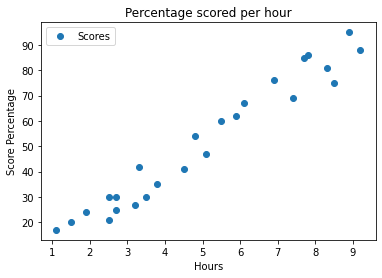

In [6]:
#Ploting the distribution of scores
s_data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Percentage scored per hour')
plt.xlabel('Hours')
plt.ylabel('Score Percentage')
plt.show()

### This graphs shows the positive linear relation that exists between the number of hours studied and percentage of score

## Step 3 - Data Preprocessing

In [7]:
x = s_data.iloc[:,:-1].values
y = s_data.iloc[:, 1].values

## Step 4 - Model Training

### Here we will split the data into training and testing sets and finally train the algorithm.

In [8]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state= 0)
regression= LinearRegression()
regression.fit(x_train.reshape(-1,1), y_train)

print("Training completed")

Training completed


##  Step 5 - Plotting the line of Regression

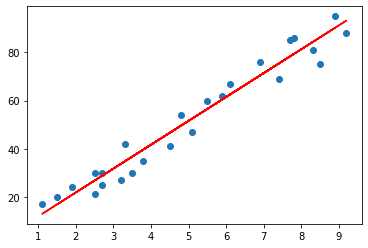

DATA CORRELATION:
            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
#Plotting the regression line
line = regression.coef_*x+regression.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line, color='red')
plt.show()
print("DATA CORRELATION:\n",s_data.corr())

## Step 6 - Making Predictions and Plotting the Comparisons

In [10]:
pred_y = regression.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [11]:
#Comparison between Actual and Predicted
t = pd.DataFrame({'Actual': y_test,'Predicted': pred_y})
t

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
#Estimating training and test score
print("Training Score:", regression.score(x_train,y_train))
print("Test Score:", regression.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


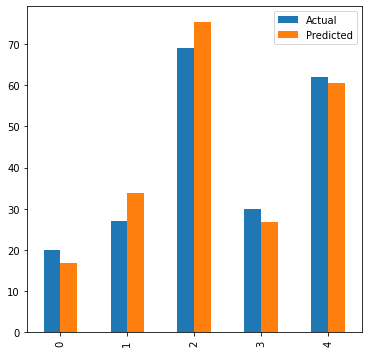

In [13]:
#Plotting to show the difference between Actual and Predicted

t.plot(kind='bar', figsize=(6,6))
plt.show()

In [14]:
#Testing the model with given info
hours= 9.25
test = np.array([hours])
test = test.reshape(1,-1)
new_pred = regression.predict(test)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737535


## Step 7 - Evaluation of the Model

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred_y)))
print('R-2:', metrics.r2_score(y_test,pred_y))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


## Conclusion

### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.

### I was successfully able to carry out the Prediction using Supervised ML task and I was able to evaluate the model's performance.

## TASK COMPLETED.